In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
column_names = ["class", "sequence_name", "sequence"]
df = pd.read_csv("splice.data", names=column_names, comment=';', header=None)

df = df[["class", "sequence"]]
max_length = df["sequence"].apply(len).max()
df["sequence"] = df["sequence"].apply(lambda seq: seq.ljust(max_length, "N"))

In [3]:
def encode_dna_sequences(sequences):
    base_map = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1]}
    encoded = np.array([[base_map.get(base, [0, 0, 0, 0]) for base in seq] for seq in sequences])
    return encoded.reshape(len(encoded), -1)

X_real_encoded = encode_dna_sequences(df["sequence"])

In [4]:
label_map = {'N': 0, 'EI': 1, 'IE': 2}
y_real = df["class"].map(label_map).values

Epoch 1/50


C:\Users\milam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5779 - loss: 0.9360 - val_accuracy: 0.7984 - val_loss: 0.6663
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8213 - loss: 0.6188 - val_accuracy: 0.8591 - val_loss: 0.4735
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8743 - loss: 0.4470 - val_accuracy: 0.8885 - val_loss: 0.3779
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9068 - loss: 0.3398 - val_accuracy: 0.8982 - val_loss: 0.3235
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9216 - loss: 0.2908 - val_accuracy: 0.9022 - val_loss: 0.3022
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9248 - loss: 0.2488 - val_accuracy: 0.9119 - val_loss: 0.2741
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9454 - loss: 0.2148 - val_accuracy: 0.9139 - val_loss: 0.2571
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9424 - loss: 0.1989 - val_accuracy: 0.9119 - val_loss: 0.2469
Epo

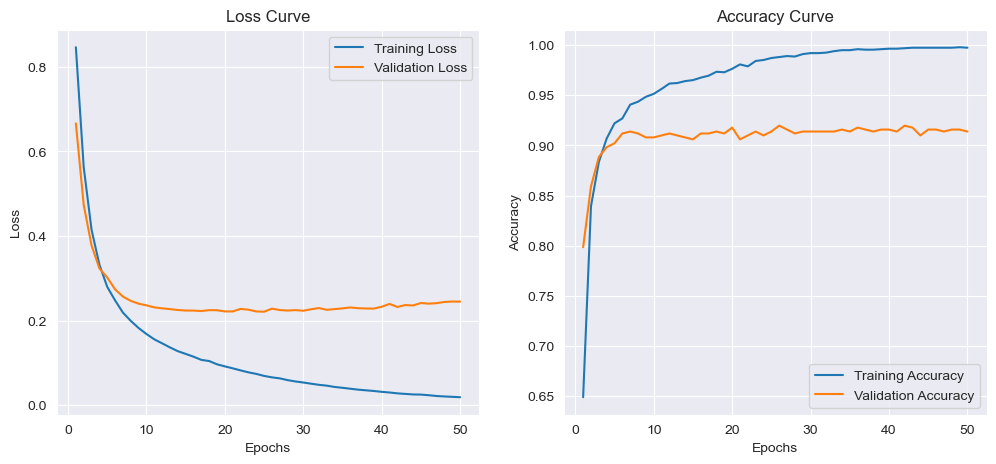

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_real_encoded, y_real, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
hidden_size = 8
output_size = 3

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_size, input_shape=(input_size,), activation='tanh'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

epochs = range(1, 51)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
train_loss, train_accuracy = model.evaluate(X_train, y_train)

print(f"Test Accuracy on DNA Data: {test_accuracy * 100:.2f}%")
print(f"Train Accuracy on DNA Data: {train_accuracy * 100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.3803 
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0237
Test Accuracy on DNA Data: 90.75%
Train Accuracy on DNA Data: 98.12%
